# Initial DSP Task

In [13]:
import numpy as np 
import math
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
from scipy import signal

## sine wave : f = 2 GHz, t = 10 ns

In [14]:
freq = 2
dur = 10
sr = 200000
ts = 1/sr
t = np.arange(0, dur, ts)

In [15]:
# sine wave equation = Asin(wt)
# A = amplitude, w = angular frequency, t = time
x = np.sin((2*np.pi*freq*t)) # +(2*np.pi)

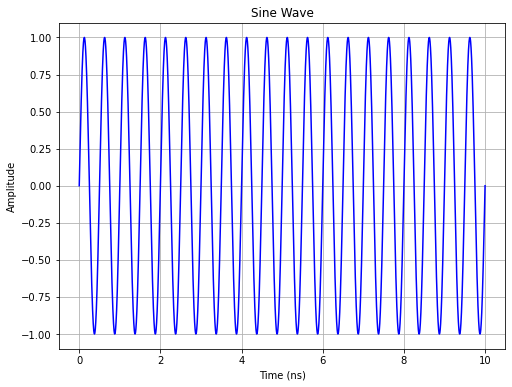

In [16]:
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'b')
plt.title('Sine Wave')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.grid(True, which='both')

plt.savefig('sin_wav.png', bbox_inches='tight', dpi=200)
plt.show()

### calculate FFT 

In [17]:
X = fft(x) # fast fourier transform of sine wave
N = len(X) # num of samples in fft
n = np.arange(N) # list of samples in fft
T = N/sr # period
freq = n/T # list of frequencies

#print(freq)

### plot magnitude and phase

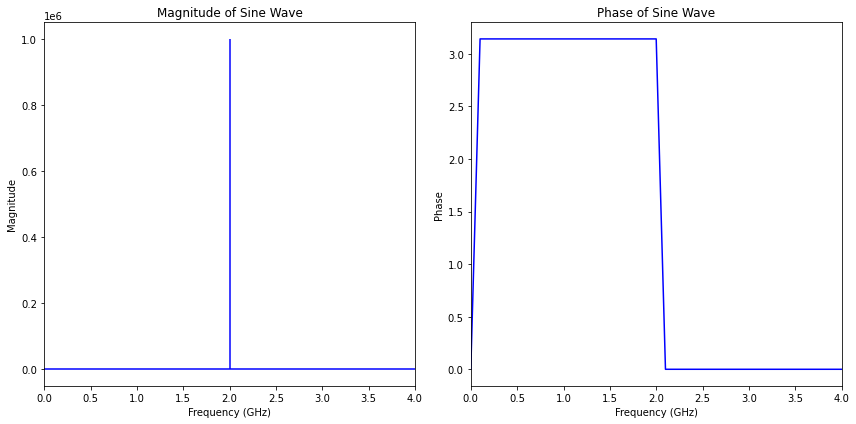

In [23]:
plt.figure(figsize = (12,6))

plt.subplot(121)
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude')
plt.xlim(0, 4)
plt.title('Magnitude of Sine Wave')

plt.subplot(122)
plt.plot(freq, np.angle(X.imag), 'b')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Phase')
plt.xlim(0, 4)
plt.title('Phase of Sine Wave')

plt.savefig('sin_freq.png', bbox_inches='tight', dpi=200)

plt.tight_layout()
plt.show()

## rectangular pulse : width = 1 ns

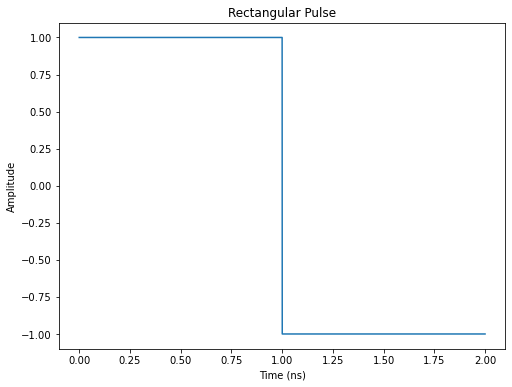

In [7]:
p = 2 # period (ns)
n = 1 # num of pulses


t = np.linspace(0, p*n, 10000, endpoint=False)

# square(2pi * f * t)
x_sq = signal.square((2*np.pi*(1/p)*t))

plt.figure(figsize = (8, 6))
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.title('Rectangular Pulse')
plt.plot(t, x_sq)

plt.savefig('rec_pul.png', bbox_inches='tight', dpi=200)

plt.show()

### calculate FFT 

In [8]:
X_sq = fft(x_sq)
N = len(X_sq)
n = np.arange(N)
T = N/sr
freq = n/T

### plot magnitude and phase

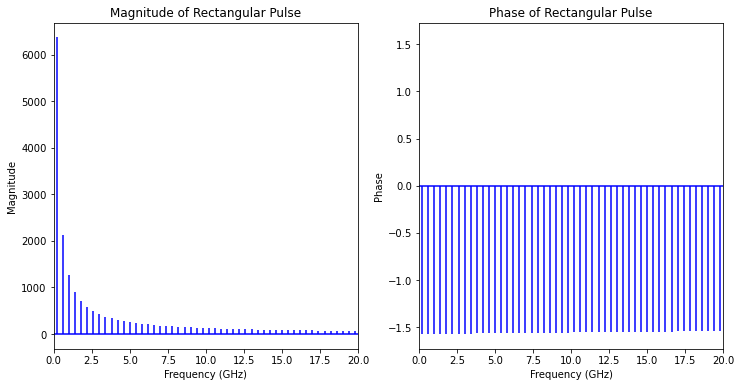

In [9]:
plt.figure(figsize = (12,6))

plt.subplot(121)
plt.stem(freq, np.abs(X_sq), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude')
plt.title('Magnitude of Rectangular Pulse')
plt.xlim(0, 20)

plt.subplot(122)
plt.stem(freq, np.angle(X_sq), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency (GHz)')
plt.ylabel('Phase')
plt.title('Phase of Rectangular Pulse')
plt.xlim(0, 20)

plt.savefig('rec_freq.png', bbox_inches='tight', dpi=200)
plt.show()

## gaussian pulse : centre f = 3 GHz, bandwidth = 1 GHz

### magnitude

In [10]:
t = np.linspace(-1, 1, 200)
r, i, e = signal.gausspulse(t, fc=3, retquad=True, retenv=True)

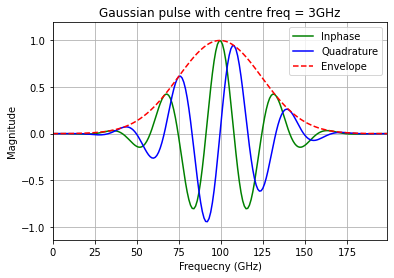

In [11]:
plt.plot(r, color='g') # real part
plt.plot(i, color='b') # imaginary part
plt.plot(e, '--', color='r') # envelope

plt.title('Gaussian pulse with centre freq = 3GHz')
plt.ylabel("Magnitude")
plt.xlabel("Frequecny (GHz)")
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.legend(['Inphase', 'Quadrature', 'Envelope'])

plt.savefig('gauss_pul.png', bbox_inches='tight', dpi=200)
plt.show()

### phase

## Sinc Pulse

ValueError: x and y must have same first dimension, but have shapes (50,) and (20000,)

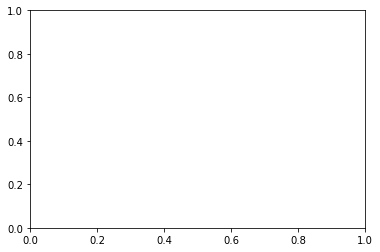

In [12]:
x_sn = np.linspace(0, 10)

plt.plot(x_sn, np.sinc(x))
plt.title('Sinc Pulse')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.grid(which='both', axis='both')

plt.savefig('sinc_pul.png', bbox_inches='tight', dpi=200)
plt.show()

### calculate FFT

In [ ]:
X_sn = fft(x_sn)
N = len(X_sn)
n = np.arange(N)
T = N/sr
freq = n/T

In [ ]:
X_sn

### plot magnitude and phase

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(121)
plt.stem(freq, np.abs(X_sn), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude')
plt.title('Magnitude of Sinc Pulse')
plt.xlim(-20, 20)

plt.subplot(122)
plt.stem(freq, np.angle(X_sn), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency (GHz)')
plt.ylabel('Phase')
plt.title('Phase of Sinc Pulse')
plt.xlim(-20, 20)

plt.savefig('sinc_freq.png', bbox_inches='tight', dpi=200)
plt.show()